In [55]:
# Robert Cocker
# Dr. Farbin
# DATA-3402
# Lab 3
# 2/16/2024

# Lab 3

### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [56]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.15390961701777806


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [94]:
def generate_uniform(N,x_min,x_max):
    out = []
    for _ in range(N):
        random_number = random.random()
        scaled_number = random_number * (x_max - x_min) + x_min
        out.append(scaled_number)
    return out

In [95]:
# Test your solution here
data=generate_uniform(1000,-10,10)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

Data Type: <class 'list'>
Data Length: 1000
Type of Data Contents: <class 'float'>
Data Minimum: -9.988731443994007
Data Maximum: 9.93791001990514


*Exercise 2a:* 
Write a function that computes the mean of values in a list. Recall the equation for the mean of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\bar{x}} = \frac{1}{n} \sum_i^n x_i$.

In [96]:
def mean(Data):
    m=0.
    
    if not Data:
        return None  # Return None if list is empty
    
    # Calculate sum of values
    total_sum = sum(Data)
    
    # Calculate mean
    m = total_sum / len(Data)

    return m

In [97]:
# Test your solution here
print ("Mean of Data:", mean(data))

Mean of Data: 0.03207328365953548


*Exercise 2b:* 
Write a function that computes the variance of values in a list. Recall the equation for the variance of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\langle x \rangle} = \frac{1}{n} \sum_i^n (x_i - {\bf\bar{x}})$.

In [98]:
# Skeleton
def variance(Data):
    m=0.
    
    ### BEGIN SOLUTION

    n = len(Data)
    mean = sum(Data) / n
    deviations = [(x - mean) ** 2 for x in Data]
    m = sum(deviations) / n
    
    ### END SOLUTION
    
    return m

In [99]:
# Test your solution here
print ("Variance of Data:", variance(data))

Variance of Data: 34.79037978973739


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [100]:
# Solution
def histogram(x, n_bins=10, x_min=None, x_max=None):
    ### BEGIN SOLUTION

    if x_min is None:
        x_min = min(x)
    if x_max is None:
        x_max = max(x)

    bin_size = (x_max - x_min) / n_bins
    hist = [0] * n_bins
    bin_edges = [x_min + i * bin_size for i in range(n_bins + 1)]

    for value in x:
        for i in range(n_bins):
            if x_min + i * bin_size <= value < x_min + (i + 1) * bin_size:
                hist[i] += 1
                break

    ### END SOLUTION

    return hist, bin_edges

In [101]:
# Test your solution here
h,b=histogram(data,100)
print(h)

[11, 15, 10, 11, 8, 17, 10, 19, 10, 13, 12, 6, 6, 8, 6, 9, 8, 11, 11, 7, 14, 14, 3, 13, 5, 9, 7, 11, 14, 11, 8, 10, 7, 8, 10, 11, 9, 6, 8, 12, 6, 6, 12, 8, 13, 5, 11, 6, 9, 8, 13, 7, 11, 7, 7, 17, 11, 7, 7, 8, 15, 17, 10, 7, 9, 11, 6, 12, 9, 4, 14, 11, 10, 13, 8, 7, 14, 17, 11, 8, 12, 14, 9, 8, 9, 11, 5, 15, 15, 10, 6, 6, 18, 16, 9, 14, 8, 7, 10, 7]


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [102]:
# Solution
def draw_histogram(x, n_bins, x_min=None, x_max=None, character="#", max_character_per_line=20):
    hist, bin_edges = histogram(x, n_bins, x_min, x_max)

    max_value = max(hist)
    scale = max_value / max_character_per_line

    for i in range(n_bins):
        print(f'[{bin_edges[i]:3.0f}, {bin_edges[i+1]:3.0f}] : {character * int(hist[i]//scale)}')

    return hist, bin_edges


In [103]:
# Test your solution here
h,b=draw_histogram(data,20)

[-10,  -9] : ###############
[ -9,  -8] : ###################
[ -8,  -7] : ###########
[ -7,  -6] : #############
[ -6,  -5] : ##############
[ -5,  -4] : ###############
[ -4,  -3] : ############
[ -3,  -2] : #############
[ -2,  -1] : #############
[ -1,  -0] : ###########
[ -0,   1] : #############
[  1,   2] : ##############
[  2,   3] : ################
[  3,   4] : ############
[  4,   5] : ################
[  5,   6] : ################
[  6,   7] : ###############
[  7,   8] : ################
[  8,   9] : ###############
[  9,  10] : #############


## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [104]:
def where(mylist, myfunc):
    out = []
    for i, x in enumerate(mylist):
        if myfunc(x):
            out.append(i)
    return out

In [105]:
# Test your solution here
data = [0.2, 0.6, 0.8, 0.3, 0.9, 0.1]
greater_than_0_5 = where(data, lambda x: x > 0.5)
print(greater_than_0_5)

[1, 2, 4]


*Exercise 6:* The `inrange(mymin,mymax)` function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [106]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)

# Test of inrange
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print ("Number of Entries passing F1:", len(where(data,F1)))
print ("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False
Number of Entries passing F1: 6
Number of Entries passing F2: 0


In [107]:
### BEGIN SOLUTION
def is_even():
    def test_even(x):
        return x % 2 == 0
    return test_even

def is_odd():
    def test_odd(x):
        return x % 2 != 0
    return test_odd

def greater_than(n):
    def test_greater(x):
        return x > n
    return test_greater

def less_than(n):
    def test_less(x):
        return x < n
    return test_less

def equal_to(n):
    def test_equal(x):
        return x == n
    return test_equal

def divisible_by(n):
    def test_divisible(x):
        return x % n == 0
    return test_divisible    
    
### END SOLUTION

In [108]:
# Test your solution
# Examples:
F1 = is_even()
F2 = greater_than(10)

# Test of is_even and greater_than
print(F1(0), F1(1), F1(10), F1(15), F1(20))
print(F2(0), F2(1), F2(10), F2(15), F2(20))

# Assuming 'data' is a list of numbers
data = [0, 1, 10, 15, 20]
print("Number of Entries passing F1:", len([x for x in data if F1(x)]))
print("Number of Entries passing F2:", len([x for x in data if F2(x)]))  

True False True False True
False False False True True
Number of Entries passing F1: 3
Number of Entries passing F2: 2


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [109]:
### BEGIN SOLUTION
def is_even():
    return lambda x: x % 2 == 0

def is_odd():
    return lambda x: x % 2 != 0

def greater_than(n):
    return lambda x: x > n

def less_than(n):
    return lambda x: x < n

def equal_to(n):
    return lambda x: x == n

def divisible_by(n):
    return lambda x: x % n == 0        
    
### END SOLUTION

## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number `test_x` within the specified range and another number `p` between the `min` and `max` of the function (which you will have to determine). If `p<=function(test_x)`, then place `test_x` on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, `N`. For this problem, it's OK to determine the `min` and `max` by numerically sampling the function.  

In [110]:
import random
import numpy as np

def generate_function(func, x_min, x_max, N=1000):
    out = list()
    x = np.linspace(x_min, x_max, 1000)
    y = func(x)
    max_y = max(y)
    while len(out) < N:
        test_x = random.uniform(x_min, x_max)
        p = random.uniform(0, max_y)
        if p <= func(test_x):
            out.append(test_x)
    return out

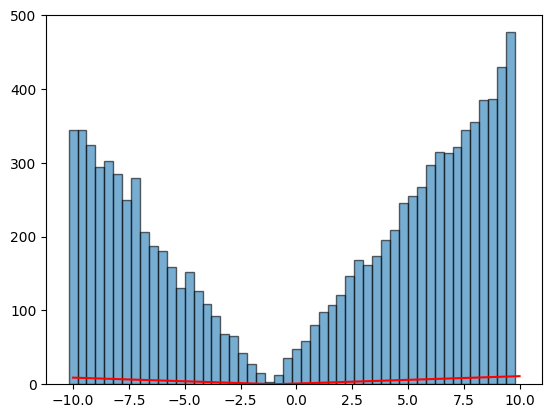

In [111]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

# Generate numbers using the test function
x_min = -10
x_max = 10
N = 10000
numbers = generate_function(test_func, x_min, x_max, N)

# Generate histogram using your function
hist, bin_edges = histogram(numbers, n_bins=50)

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", alpha=0.6)

# Plot the test function
x = np.linspace(x_min, x_max, 1000)
y = test_func(x)
plt.plot(x, y, 'r-')
plt.show()

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

In [112]:
import numpy as np

def gaussian(mean, sigma):
    def f(x):
        return np.exp(-((x-mean)**2)/(2*sigma**2))/np.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

Mean: 0.00047575876080266876
Variance: 1.0581827537528683


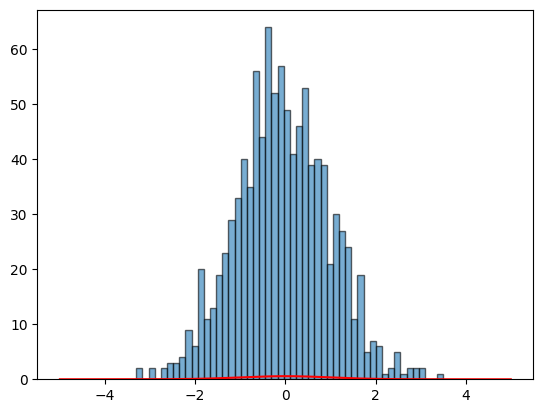

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Instantiate your Gaussian function
mean = 0
sigma = 1
g1 = gaussian(mean, sigma)

# Generate numbers using the Gaussian function
N = 1000
numbers = generate_function(g1, mean - 5*sigma, mean + 5*sigma, N)

# Confirm the mean and variance
print("Mean:", np.mean(numbers))
print("Variance:", np.var(numbers))

# Generate histogram using your function
hist, bin_edges = histogram(numbers, n_bins=50)

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", alpha=0.6)

# Plot the Gaussian function
x = np.linspace(mean - 5*sigma, mean + 5*sigma, 1000)
y = [g1(xi) for xi in x]
plt.plot(x, y, 'r-')
plt.show()

In [91]:
import numpy as np

print("Mean:", np.mean(data))
print("Variance:", np.var(data))

Mean: -0.01694690058429054
Variance: 1.0464121622833251


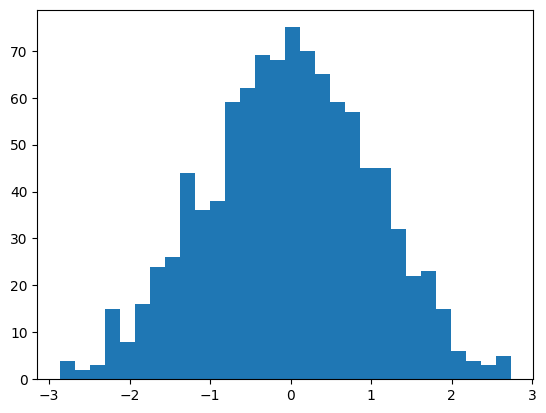

In [92]:
import matplotlib.pyplot as plt

plt.hist(data, bins=30)
plt.show()

*Exercise 9:* Combine your `generate_function`, `where`, and `inrange` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [121]:
import numpy as np

def gaussian(mean, sigma):
    def f(x):
        return np.exp(-((x-mean)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
    return f

def integrate(func, x_min, x_max, N=1000):
    def generate_uniform(N, x_min, x_max):
        return np.linspace(x_min, x_max, N)

    def inrange(mymin, mymax):
        def testrange(x):
            return x<mymax and x>=mymin
        return testrange

    def where(mylist, myfunc):
        out = []
        for i, x in enumerate(mylist):
            if myfunc(x):
                out.append(i)
        return out

    x = generate_uniform(N, x_min, x_max)
    y = [func(xi) for xi in x]
    in_range = inrange(x_min, x_max)
    valid_indices = where(x, in_range)
    y = [y[i] if i in valid_indices else 0 for i in range(N)]
    integral = sum(y) * (x_max - x_min) / N
    return integral

In [124]:
# Instantiate Gaussian function
g1 = gaussian(0, 1)

# Calculate integral within one standard variance
integral = integrate(g1, -1, 1, N=1000)

print("Integral within one variance:", integral)

Integral within one variance: 0.6820066411696352
